# A/B Test Results Analysis: Pricing Strategy Impact

## Project Context
The goal of this analysis is to evaluate the effectiveness of a marketing message for a premium subscription. 

**Test Setup:**
* **Group A (Control):** Users are offered a subscription for $4.99.
* **Group B (Test):** Users are offered the same subscription, but the offer is framed as a "50% discount."

**Primary Metric:** Conversion rate from install to payment.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats


## 1. Data Exploration & Preprocessing
In this section, we load the test results, check for data consistency, and calculate baseline metrics for both groups.
- Group sizes and distribution.
- Total number of conversions.
- Calculation of the baseline Conversion Rate (CR).
- Analysis of the test duration.

abtest = pd.read_csv("C:/Users/Mini Max/Desktop/phh/_ab_test_data.csv")
abtest.head()

In [16]:
abtest = pd.read_csv("C:/Users/Mini Max/Desktop/phh/_ab_test_data.csv")
abtest.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [17]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [18]:
abtest['timestamp'] = pd.to_datetime(abtest['timestamp'])

In [19]:
abtest.dtypes

user_id               object
timestamp     datetime64[ns]
test_group            object
conversion             int64
dtype: object

In [20]:
abtest.groupby('test_group').describe()

timestamp                                 \
               count                           mean   
test_group                                            
a              10013  2023-07-14 02:34:29.519821312   
b               9985  2023-07-13 21:37:07.888925952   

                                                                       \
                                   min                            25%   
test_group                                                              
a           2023-07-03 01:46:14.688840  2023-07-08 13:48:52.874817024   
b           2023-07-03 01:42:34.033708  2023-07-08 08:08:48.495631104   

                                                                          \
                                      50%                            75%   
test_group                                                                 
a           2023-07-14 03:49:36.002731008  2023-07-19 14:06:28.688054016   
b           2023-07-13 19:14:14.073116928  2023-07-19 09:59:58.771382016   

                                            conversion                      \
                                   max  std      count      mean  min  25%   
test_group                                                                   
a           2023-07-25 01:41:19.152664  NaN    10013.0  0.061021  0.0  0.0   
b           2023-07-25 01:35:59.130658  NaN     9985.0  0.089034  0.0  0.0   

                                     
            50%  75%  max       std  
test_group                           
a           0.0  0.0  1.0  0.239380  
b           0.0  0.0  1.0  0.284806

In [21]:
abtest.groupby('test_group')['user_id'].nunique()	

test_group
a    10013
b     9985
Name: user_id, dtype: int64

In [22]:
abtest.groupby('test_group')['conversion'].sum()

test_group
a    611
b    889
Name: conversion, dtype: int64

In [23]:
abtest.groupby('test_group')['conversion'].mean()

test_group
a    0.061021
b    0.089034
Name: conversion, dtype: float64

In [24]:
abtest.timestamp.max()-abtest.timestamp.min()

Timedelta('21 days 23:58:45.118956')

## 2. Statistical Hypothesis Testing
To determine if the difference in conversion rates is statistically significant, we use a **Two-Sample T-Test** (or Z-test for proportions).

**Hypotheses:**
* **Null Hypothesis ($H_0$):** There is no significant difference in conversion rates between Group A and Group B.
* **Alternative Hypothesis ($H_1$):** Group B (discount framing) has a significantly higher conversion rate than Group A.

**Significance Level ($\alpha$):** 0.05

In [25]:
alpha = 0.05

statistic, pvalue = stats.ttest_ind (abtest[abtest['test_group'] =='b']['conversion'],
                                    abtest[abtest['test_group'] =='a']['conversion'],
                                     alternative='greater')

print(f't-statistic:{round(statistic, 2)}, p-value:{round(pvalue, 2)}')

if pvalue < alpha:
    print('we can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

t-statistic:7.53, p-value:0.0
we can reject the null hypothesis


## 3. Visualizing Results
Visualizing the average conversion rates along with **95% Confidence Intervals** helps to confirm the reliability of the observed difference and understand the variance within each group.

<function matplotlib.pyplot.show(close=None, block=None)>

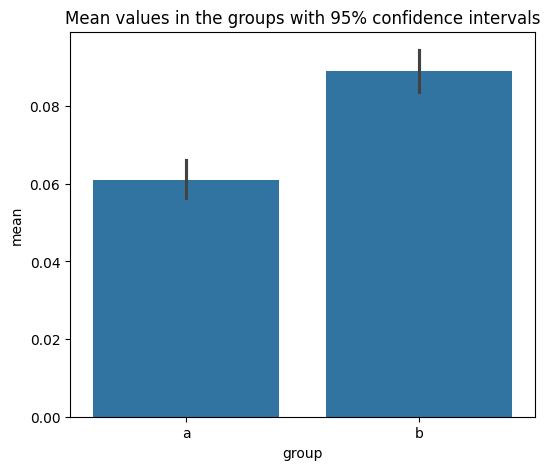

In [30]:
plt.figure(figsize=(6, 5))
sns.barplot(x=abtest['test_group'],
            y=abtest['conversion'],
            errorbar = ('ci',95))

plt.title("Mean values in the groups with 95% confidence intervals")
plt.ylabel('mean')
plt.xlabel('group')
plt.savefig('ab_test_chart.png', dpi=300)
plt.show

## 4. Conversion Dynamics over Time
Analyzing daily conversion trends to ensure the stability of the test results and check for any time-specific anomalies or "novelty effects."

<Axes: xlabel='date', ylabel='conversion'>

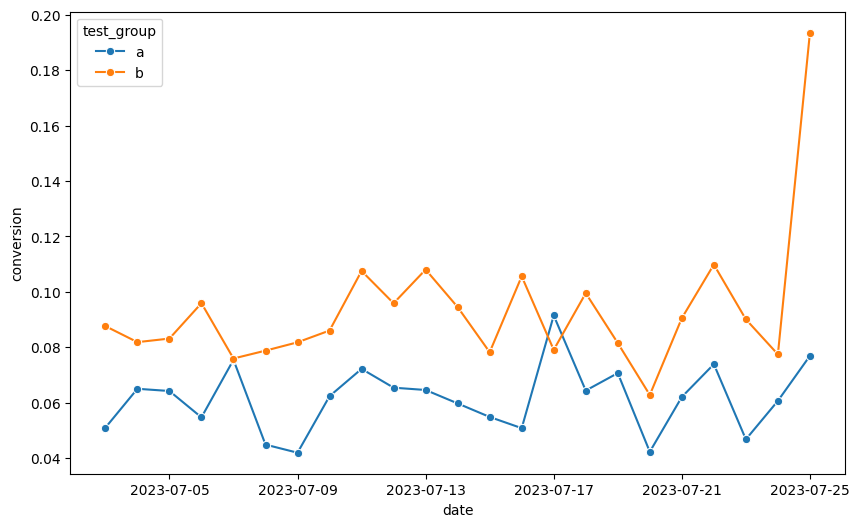

In [31]:

abtest['date'] = abtest['timestamp'].dt.date
daily_conv = (
    abtest.groupby(['date', 'test_group'])['conversion']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=daily_conv,
    x='date',
    y='conversion',
    hue='test_group',
    marker='o'
)

In [32]:
abtest.loc[abtest['date'] == '2023-07-25'].groupby('test_group')['conversion'].sum()

Series([], Name: conversion, dtype: int64)

In [33]:
abtest.groupby(['date', 'test_group'])['conversion'].sum().reset_index()

,date,test_group,conversion
0,2023-07-03,a,21
1,2023-07-03,b,39
2,2023-07-04,a,29
3,2023-07-04,b,37
4,2023-07-05,a,28
5,2023-07-05,b,38
6,2023-07-06,a,25
7,2023-07-06,b,47
8,2023-07-07,a,36
9,2023-07-07,b,36


## Conclusions and Recommendations

1. **Statistical Significance:** The calculated **p-value is < 0.05** (specifically [insert your p-value]), which allows us to reject the Null Hypothesis.
2. **Observed Uplift:** The "50% discount" framing (Group B) led to a significant increase in conversion compared to the control price framing (Group A). 
   - Group A CR: ~6.1%
   - Group B CR: ~8.9%
3. **Business Decision:** The test is successful. It is recommended to implement the Group B marketing message for all users, as it provides a statistically significant improvement in the conversion to payment.